<a href="https://colab.research.google.com/github/jm19465/CE888/blob/master/Lab_7/Exercise_4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
os.environ['KAGGLE_USERNAME'] = "guillermomejia"
os.environ['KAGGLE_KEY'] = "72538d1c63af91e0bd757768279c3ba1"
!kaggle datasets download -d arunrk7/surface-crack-detection
# change dataset to -- kaggle datasets download -d arunrk7/surface-crack-detection

 92% 215M/233M [00:01<00:00, 133MB/s]
100% 233M/233M [00:01<00:00, 124MB/s]


In [15]:
from zipfile import ZipFile

file_name = "/content/surface-crack-detection.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [18]:
data_dir_list = os.listdir('/content/Negative')
path, dirs, files = next(os.walk("/content/Negative"))
file_count = len(files)
print(file_count)

20000


In [0]:
original_dataset_dir_pos = '/content/Positive'
original_dataset_dir_neg = '/content/Negative'
base_dir = '/content/PosNeg'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_positive_dir = os.path.join(train_dir, 'positive')
os.mkdir(train_positive_dir)

train_negative_dir = os.path.join(train_dir, 'negative')
os.mkdir(train_negative_dir)

validation_positive_dir = os.path.join(validation_dir, 'positive')
os.mkdir(validation_positive_dir)

validation_negative_dir = os.path.join(validation_dir, 'negative')
os.mkdir(validation_negative_dir)

test_positive_dir = os.path.join(test_dir, 'positive')
os.mkdir(test_positive_dir)

test_negative_dir = os.path.join(test_dir, 'negative')
os.mkdir(test_negative_dir)

In [0]:
import shutil
fnames = []

for i in range(1,1001):
  if i < 10:
    name = '0000{}.jpg'.format(i)
    fnames.append(name)
  if i >= 10 and i <100:
    name = '000{}.jpg'.format(i)
    fnames.append(name)
  if i >=100 and i < 1000:
    name = '00{}.jpg'.format(i)
    fnames.append(name)
  if i >= 1000:
    name = '0{}.jpg'.format(i)
    fnames.append(name)

for fname in fnames:
    src = os.path.join(original_dataset_dir_pos, fname)
    dst = os.path.join(train_positive_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['0{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_pos, fname)
    dst = os.path.join(validation_positive_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['0{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_pos, fname)
    dst = os.path.join(test_positive_dir, fname)
    shutil.copyfile(src, dst)

fnames = []
for i in range(1,1001):
  if i < 10:
    name = '0000{}.jpg'.format(i)
    fnames.append(name)
  if i >= 10 and i <100:
    name = '000{}.jpg'.format(i)
    fnames.append(name)
  if i >=100 and i < 1000:
    name = '00{}.jpg'.format(i)
    fnames.append(name)
  if i >= 1000:
    name = '0{}.jpg'.format(i)
    fnames.append(name)

for fname in fnames:
    src = os.path.join(original_dataset_dir_neg, fname)
    dst = os.path.join(train_negative_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['0{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_neg, fname)
    dst = os.path.join(validation_negative_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['0{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_neg, fname)
    dst = os.path.join(test_negative_dir, fname)
    shutil.copyfile(src, dst)

In [37]:
print('total training positive images:', len(os.listdir(train_positive_dir)))
print('total training negative images:', len(os.listdir(train_negative_dir)))
print('total validation positive images:', len(os.listdir(validation_positive_dir)))

print('total validation negative images:', len(os.listdir(validation_negative_dir)))
print('total test positive images:', len(os.listdir(test_positive_dir)))
print('total test negative images:', len(os.listdir(test_negative_dir)))

total training positive images: 1000
total training negative images: 1000
total validation positive images: 500
total validation negative images: 500
total test positive images: 500
total test negative images: 500


In [38]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30
100/100 [==============================] - 93s 929ms/step - loss: 0.3325 - acc: 0.8650 - val_loss: 0.1020 - val_acc: 0.9800
Epoch 2/30
100/100 [==============================] - 92s 922ms/step - loss: 0.0874 - acc: 0.9720 - val_loss: 0.0621 - val_acc: 0.9850
Epoch 3/30
100/100 [==============================] - 92s 918ms/step - loss: 0.0708 - acc: 0.9800 - val_loss: 0.0354 - val_acc: 0.9850
Epoch 4/30
100/100 [==============================] - 92s 920ms/step - loss: 0.0635 - acc: 0.9780 - val_loss: 0.0350 - val_acc: 0.9850
Epoch 5/30
100/100 [==============================] - 91s 913ms/step - loss: 0.0606 - acc: 0.9820 - val_loss: 0.0548 - val_acc: 0.9800
Epoch 6/30
100/100 [==============================] - 92s 915ms/step - loss: 0.0450 - acc: 0.9855 - val_loss: 0.0397 - val_acc: 0.9850
Epoch 7/30
100/100 [==============================] - 91s 914ms/step - loss: 0.0416 - acc: 0.9890 - val_loss: 0.0318 - val_acc: 0.9900
Epoch 8/30
100/100 [==============================] - 9

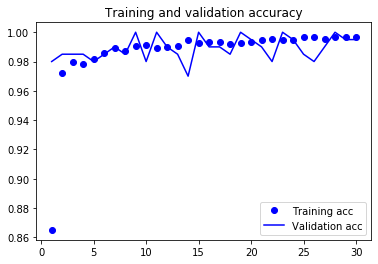

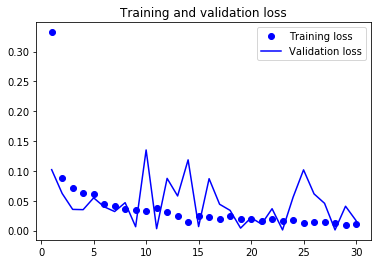

In [43]:
model.save('pos_neg.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)